# Lecture 17: More on plotting

__Reading Material:__

[Numpy tutorial](https://docs.scipy.org/doc/numpy-1.15.0/user/quickstart.html)



## Plotting 2D functions using numpy

We use `numpy.ogrid` to create a 2-dimensional grid as the input set for a 2D function. In `NumPy`, the letter `j` is used to indicate the imaginary unit `i = sqrt(−1)`. In `numpy.ogrid`, it changes the way that an equispaced list is created. For example, compare the following inputs, and pay special attention to the first and last elements of the arrays.

Note: if the step length is a complex number (e.g. `20j`), then the integer part of its magnitude is interpreted as specifying the number of points to create between the start and stop values, where the stop value is inclusive.

In [10]:
(1,)

(1,)

In [12]:
a = np.arange(5)
a.shape

(5,)

In [16]:
a = np.arange(24).reshape((3,4,-1))
print(a)
a.shape

[[[ 0  1]
  [ 2  3]
  [ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]
  [12 13]
  [14 15]]

 [[16 17]
  [18 19]
  [20 21]
  [22 23]]]


(3, 4, 2)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.ogrid[0:10:5]

array([0, 5])

In [3]:
np.ogrid[0:10:5j] #w/j , 5j refers to the number of grids you want 

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [5]:
x,y = np.ogrid[0:10:5j, 0:1:5j]
print(x)
#print(x.shape)
print(y)
#print(y.shape)

[[ 0. ]
 [ 2.5]
 [ 5. ]
 [ 7.5]
 [10. ]]
[[0.   0.25 0.5  0.75 1.  ]]


In [6]:
np.ogrid[0:10:5, 0:1:5]

[array([[0],
        [5]]), array([[0]])]

We plot our first 2D function, using the `imshow()` function in matplotlib.pyplot. In this case the function takes a 2D array of real numbers, and maps them to a color function. We can ask `pyplot` to add a colorbar to the image, displaying the mapping function.


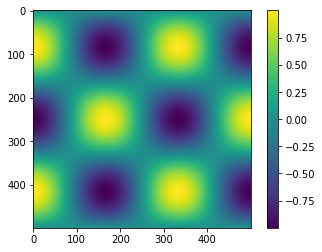

In [8]:
x,y=np.ogrid[0:1:500j,0:1:500j]
#z=x*x+y*y
z = np.sin(3.0*np.pi*x)*np.cos(3.0*np.pi*y)
plt.imshow(z)
plt.colorbar()
plt.show()

As another example of a 2D funtion, we plot the Mandelbrot set. For an explanation of the definition of this fractal, see [MandelbrotSet](http://mathworld.wolfram.com/MandelbrotSet.html), although this is by no means part of the course material.

In [ ]:
a,b=np.ogrid[-1:1:100j, -1.5:.5:100j]
c=a*1j+b
z=0
for i in range(20):
    z=z**2+c
plt.imshow(abs(z))
plt.show()

We may also import image files, which are translated to arrays of this form, using the __matplotlib.image__ module.

In [ ]:
import matplotlib.image as mpimg 
img=mpimg.imread('kitty-cat.jpg') 
plt.imshow(img)
plt.show()

## Masks

Masks are arrays of Boolean variables (that take values True or False). If we apply a mask to an image before performing an operation, it will only perform the operation at values where the mask is true. For example, see how we create the following image using masks. The second line converts the array to a numpy array, which allows us to specify the type of the elements. In this case, and almost always in the future, we want to make sure that they are floats, not integers.

(100, 100, 3)


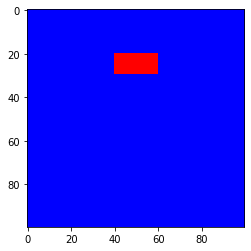

In [4]:
im=[[[0,0,1]]*100]*100 
im=np.array(im,dtype='float')
im[20:30, 40:60] = [1,0,0]
print(im.shape)
plt.imshow(im)
plt.show()

In [13]:
x1 = np.arange(5).reshape((5,1))
x2 = np.arange(5).reshape((1,5))
print(x1, x2)
print(x1 + x2)
print(x1 > x2)

[[0]
 [1]
 [2]
 [3]
 [4]] [[0 1 2 3 4]]
[[0 1 2 3 4]
 [1 2 3 4 5]
 [2 3 4 5 6]
 [3 4 5 6 7]
 [4 5 6 7 8]]
[[False False False False False]
 [ True False False False False]
 [ True  True False False False]
 [ True  True  True False False]
 [ True  True  True  True False]]


[[False False False False False]
 [ True False False False False]
 [ True  True False False False]
 [ True  True  True False False]
 [ True  True  True  True False]]


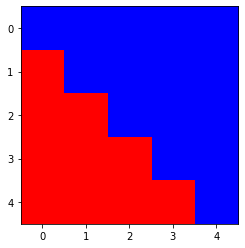

In [8]:
im=[[[0,0,1]]*5]*5
im=np.array(im,dtype='float')
x, y = np.ogrid[0:5, 0:5]
print(x > y)
mask = x > y # numpy array broadcasting, x is 5 x 1, y is 1 x 5, x > y is 5 x 5
im[mask] = [1,0,0]
plt.imshow(im)
plt.show()

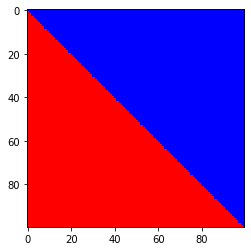

In [9]:
im=[[[0,0,1]]*100]*100 
im=np.array(im,dtype='float') 
x,y=np.ogrid[0:100, 0:100] 
mask=x>y
im[mask]=[1,0,0]
plt.imshow(im)
plt.show()

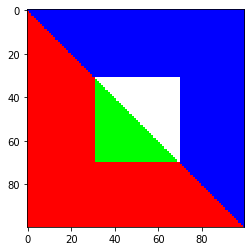

In [14]:
im=[[[0,0,1]]*100]*100 
im=np.array(im,dtype='float') 
x,y=np.ogrid[0:100, 0:100] 
mask=x>y
im[mask]=[1,0,0]

mask=(x>30)&(x<70)&(30<y)&(y<70)
im[mask]=[1,1,1]
mask=(x>30)&(x<70)&(y>30)&(y<70)&(x>y)
im[mask]=[0,1,0]
plt.imshow(im)
plt.show()

Now let's import a image file using the __matplotlib.image__ module and add a mask to it.

In [ ]:
import matplotlib.image as mpimg 
img=mpimg.imread('kitty-cat.jpg') 
plt.imshow(img)
plt.show()

In [ ]:
# add your code here:

### Exercises
- Import an image of your choice, and add a white border to it.